In [ ]:
# This is predecessor code for reading in FITS images and doing other stuff
# for analysis pertinent to test FPR 0987

# Created 2021 July 6 by E.S.

In [57]:
from astropy.io import fits
import matplotlib.pyplot as plt
import photutils
from photutils import DAOStarFinder
import numpy as np
import pandas as pd
import glob
import os
from itertools import combinations

%matplotlib qt

# Part 1: Read in series of raw IFS images and see if opening and closing the OMSS shutter causes a change in the illumination

In [33]:
stem = "./data/fpr_0987/"

In [34]:
file_list_omss = np.sort(glob.glob(stem + "omss_illumination/reduced/210603/*"))

In [45]:
# initialize dictionary
dict_status = {"illum":[],"omss":[]}

for fits_num in range(0,len(file_list_omss)):

    # read in raw FITS file
    hdul = fits.open(file_list_omss[fits_num])
    image_array = hdul[1].data[-1]
    omss_status = hdul[0].header["OMSSENT"]
    
    # measure median flux (betting that this minimizes effect of bad pixels)
    flux_median = np.nanmedian(image_array) #(image_array[1128:1222,338:505])
    print(flux_median)
    print(omss_status)
    print(file_list_omss[fits_num])
    print("---")
    
    dict_status["illum"].append(flux_median)
    dict_status["omss"].append(omss_status)
    
# convert to dataframe
df = pd.DataFrame(dict_status)


-3.905661
CLOSED
./data/fpr_0987/omss_illumination/reduced/210603/S20210603E0038_spdc.fits
---
-4.6150036
CLOSED
./data/fpr_0987/omss_illumination/reduced/210603/S20210603E0039_spdc.fits
---
-4.4597006
OPEN
./data/fpr_0987/omss_illumination/reduced/210603/S20210603E0040_spdc.fits
---
-3.991497
CLOSED
./data/fpr_0987/omss_illumination/reduced/210603/S20210603E0041_spdc.fits
---
-0.9590514
OPEN
./data/fpr_0987/omss_illumination/reduced/210603/S20210603E0042_spdc.fits
---
-3.4489512
CLOSED
./data/fpr_0987/omss_illumination/reduced/210603/S20210603E0043_spdc.fits
---
-3.8941057
OPEN
./data/fpr_0987/omss_illumination/reduced/210603/S20210603E0044_spdc.fits
---
-2.7556005
CLOSED
./data/fpr_0987/omss_illumination/reduced/210603/S20210603E0045_spdc.fits
---
-4.3483305
OPEN
./data/fpr_0987/omss_illumination/reduced/210603/S20210603E0046_spdc.fits
---
-3.9645283
CLOSED
./data/fpr_0987/omss_illumination/reduced/210603/S20210603E0047_spdc.fits
---
-4.6271057
OPEN
./data/fpr_0987/omss_illumination/

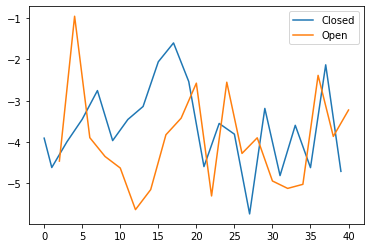

In [46]:
plt.plot(df["illum"].where(df["omss"] == "CLOSED").dropna(), label="Closed")
plt.plot(df["illum"].where(df["omss"] == "OPEN").dropna(), label="Open")
plt.legend()
plt.show()

In [25]:
df["illum"].where(df["omss"] == "CLOSED")

0     4.080565
1     3.092192
2          NaN
3     4.343024
4          NaN
5     4.578074
6          NaN
7     4.872093
8          NaN
9     3.936877
10         NaN
11    4.808969
12         NaN
13    5.223423
14         NaN
15    5.661961
16         NaN
17    6.058139
18         NaN
19    5.563123
20         NaN
21    3.632890
22         NaN
23    4.478405
24         NaN
25    4.040698
26         NaN
27    2.490034
28         NaN
29    4.680233
30         NaN
31    3.553987
32         NaN
33    4.488372
34         NaN
35    3.264120
36         NaN
37    5.512459
38         NaN
39    3.479236
40         NaN
Name: illum, dtype: float64

# Part 2: Plot changing illumination of AOWFS filter and "Show that the flux reduces for each successively narrower filter"

In [49]:
# set up data on AOWFS illumination

dict_aowfs = {"filter":["OPEN","600nm","700nm","800nm","900nm","910_to_900nm"],"counts":[2580,2540,2550,2250,805,255]}
df_aowfs = pd.DataFrame.from_dict(dict_aowfs)

In [59]:
plt.plot(dict_aowfs["counts"],marker="o")
for t in range(0,len(dict_aowfs["counts"])):
    plt.annotate(dict_aowfs["filter"][t],xy=[t,dict_aowfs["counts"][t]])
plt.ylabel("AOWFS counts")
plt.xlabel("(unitless)")
plt.show()

# Part 3: Read in series of IFS images and see if NRM movements were consistent